In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

from matplotlib import pyplot as plt

In [3]:
host_df = pd.read_csv('../Data/562_associated_data/ecoli.combined.tsv', sep='\t', index_col=0)
host_df['start_codon'] = host_df['CDS_seq'].str[0:3]
host_df = host_df[host_df['start_codon'].isin(['ATG', 'GTG'])]
host_df.head()

,Genome_source,Start,Stop,Strand,CDS_seq,Upstream_seq,locus_tag,gene_id,aSD_binding,sec_struct,...,GC_cds,GC_upstream,Start_accessibility,prot_abundance,trans_eff_2014,trans_eff_2019,essentiality_ds1,essentiality_ds2,essentiality,start_codon
0,NC_000913.3,336,2799,+,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,TTTTCGACCAAAGGTAACGAGGTAACAACC,b0002,thrA,-5.42,-21.31,...,0.530654,0.433333,-8.50,317.0,0.98,NaN,Non-essential,Non-essential,Non-essential,ATG
1,NC_000913.3,2800,3733,+,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,GTACCCTCTCATGGAAGTTAGGAGTCTGAC,b0003,thrB,-6.51,-21.87,...,0.562701,0.500000,-7.82,76.3,0.63,NaN,Non-essential,Non-essential,Non-essential,ATG
2,NC_000913.3,3733,5020,+,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,ACGGCGGGCGCACGAGTACTGGAAAACTAA,b0004,thrC,-3.40,-24.44,...,0.528361,0.566667,-3.73,530.0,1.40,NaN,Non-essential,Non-essential,Non-essential,ATG
3,NC_000913.3,5233,5530,+,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,CATAACGGGCAATGATAAAAGGAGTAACCT,b0005,yaaX,-6.51,-17.15,...,0.538721,0.400000,-9.77,NaN,0.28,NaN,Non-essential,Non-essential,Non-essential,GTG
4,NC_000913.3,5682,6459,-,ATGCTGATTCTTATTTCACCTGCGAAAACGCTTGATTACCAAAGCC...,GTCGGCATAAATTTCCTGCAAGGACTGGAT,b0006,yaaA,-4.00,-18.60,...,0.496782,0.466667,-10.08,47.9,2.07,0.410931,Non-essential,Non-essential,Non-essential,ATG


In [4]:
###To log, or not to log
# host_df['trans_eff_2014_log'] = np.log(host_df['trans_eff_2014'])
# host_df['trans_eff_2019_log'] = np.log(host_df['trans_eff_2019'])

In [5]:
fitted_model = smf.ols('trans_eff_2014 ~ aSD_binding * sec_struct + I(start_codon)', data=host_df).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         trans_eff_2014   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     115.9
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           2.34e-89
Time:                        15:07:53   Log-Likelihood:                -2290.3
No. Observations:                2099   AIC:                             4591.
Df Residuals:                    2094   BIC:                             4619.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.7952      0.132     13.610      0.000       1.537       2.054
I(start_codon)[T.GTG]     -0.2859      0.057     -5.044      0.000      -0.397      -0.175
aSD_binding               -0.1513      0.028     -5.487      0.000      -0.205      -0.097
sec_struct                 0.0441      0.007      6.591      0.000       0.031       0.057
aSD_binding:sec_struct    -0.0050      0.001     -3.736      0.000      -0.008      -0.002
==============================================================================
Omnibus:                      210.977   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.292
Skew:                           0.805   Prob(JB):                     6.80e-63
Kurtosis:                       3.824   Cond. No.                         941.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


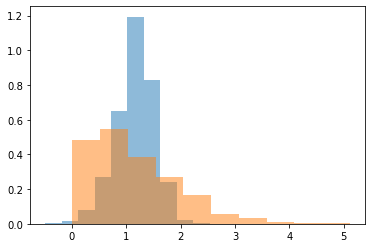

In [6]:
fig, ax = plt.subplots()
ax.hist(fitted_model.predict(host_df), alpha=0.5, density=True);
ax.hist(host_df['trans_eff_2014'], alpha=0.5, density=True);

# Working with the new-`T7` file/s

In [7]:
from Bio import SeqIO

In [12]:
# phage_genome = list(SeqIO.parse('/Users/adamhockenberry/Downloads/sequence (1).gb', format='genbank'))
# assert len(phage_genome) == 1
# phage_genome = phage_genome[0]


# cds_frag_size = 60
# us_frag_size = 30
# naming_dict = {}
# for feature in phage_genome.features:
#     if feature.type =='CDS':
#         assert feature.location.strand == 1
#         name = feature.qualifiers['note'][0].split(';')[1].split(',')[0].strip()
#         start_loc = feature.location.start
#         end_loc = feature.location.end
#         cds_full = str(phage_genome.seq[start_loc:end_loc])
#         cds_frag = str(phage_genome.seq[start_loc:start_loc+cds_frag_size])
#         us_frag = str(phage_genome.seq[start_loc-us_frag_size:start_loc])
#         naming_dict[name] = [start_loc]
#         naming_dict[name].append(cds_frag)
#         naming_dict[name].append(us_frag)

# phage_df = pd.DataFrame.from_dict(naming_dict, orient='index')
# phage_df.columns = ['start_location', 'CDS_fragment', 'Upstream_fragment']
# phage_df['start_codon'] = phage_df['CDS_fragment'].str[0:3]
# print(phage_df.shape)
# phage_df.head()

In [20]:
phage_genome = list(SeqIO.parse('/Users/adamhockenberry/Downloads/sequence.gb', format='genbank'))
assert len(phage_genome) == 1
phage_genome = phage_genome[0]
cds_frag_size = 60
us_frag_size = 30
naming_dict = {}
for feature in phage_genome.features:
    if feature.type=='gene':
        naming_dict[feature.qualifiers['locus_tag'][0]] = [feature.qualifiers['note'][0], feature.location.start]
        
for feature in phage_genome.features:
    if feature.type=='CDS':
        ltag = feature.qualifiers['locus_tag'][0]
        assert ltag in naming_dict.keys()
        assert feature.strand == 1
    
        start_loc = feature.location.start
        end_loc = feature.location.end
        cds_full = str(phage_genome.seq[start_loc:end_loc])
        cds_frag = str(phage_genome.seq[start_loc:start_loc+cds_frag_size])
        us_frag = str(phage_genome.seq[start_loc-us_frag_size:start_loc])
        naming_dict[ltag].append(cds_frag)
        naming_dict[ltag].append(us_frag)
phage_df = pd.DataFrame.from_dict(naming_dict, orient='index')
phage_df.columns = ['gene_id', 'start_location', 'CDS_fragment', 'Upstream_fragment']
phage_df['start_codon'] = phage_df['CDS_fragment'].str[0:3]
print(phage_df.shape)
phage_df.head()

(60, 5)


,gene_id,start_location,CDS_fragment,Upstream_fragment,start_codon
T7p01,gene 0.3,890,ATGGCTATGTCTAACATGACTTACAACAACGTTTTCGACCACGCTT...,TTCACTAATAACTGCACGAGGTAACACAAG,ATG
T7p02,gene 0.4,1277,ATGTCTACTACCAACGTGCAATACGGTCTGACCGCTCAAACTGTAC...,AGTCGAGGAGTACGAGGAGGATGAAGAGTA,ATG
T7p03,gene 0.7,1468,ATGAACATTACCGACATCATGAACGCTATCGACGCAATCAAAGCAC...,TCTCATAACGAACATAAAGGACACAATGCA,ATG
T7p04,gene 0.5,1495,ATGTATATGCTTACTATCGGTCTACTCACCGCTCTAGGTCTAGCTG...,TATGATTATCACTTTACTTATGAGGGAGTA,ATG
T7p05,possible gene 0.6B,1635,ATGATGAAGCACTACGTTATGCCAATCCACACGTCCAACGGGGCAA...,CATAGGAATCATCAAAGGGGCACTACGCAA,ATG


In [21]:
import json
import subprocess

In [22]:
def add_RBS_energy(df, energy_dict, col_name='aSD_binding',\
                   gaps=(4,10), expected_len=30, RBS_len=6):
    '''
    This function adds a ribosome binding site (RBS) energy column to the df based off of 
    pre-computed free energy vals (created with RNAcofold and stored in the corresponding 
    energy_dict. 
    
    Inputs:
        df - 
        energy_dict - 
        gaps - 
        expected_len - 
    
    Outputs:
        df - the transformed df object now containing the new column
    '''
    for index in df.index:
        upstream = df.loc[index,'Upstream_fragment']
        test_string = upstream.replace('T', 'U')
        ###Ensure that the sequence is the proper expected length
        if len(test_string) != expected_len:
            continue
        ###Ensure that the sequence has no abnormal bases
        if test_string.count('A') + test_string.count('U') +\
                                    test_string.count('C') + test_string.count('G') != expected_len:
            continue
            
        ###Calculate the energy for the indicated gap offsets
        energy_list = []
        for gap in range(gaps[0],gaps[1]+1):
             energy_list.append(energy_dict[test_string[-gap - RBS_len: -gap]])

        df.at[index, col_name] = min(energy_list)        
    return df


def call_RNAfold(sequence):
    sequence = sequence.replace('T', 'U')
    MyOut = subprocess.Popen(['RNAfold', '-p', '--noPS', '--noDP', '--constraint'],
            stdin=subprocess.PIPE,
            stdout=subprocess.PIPE, 
            stderr=subprocess.STDOUT)
    stdout, stderr = MyOut.communicate(input=str.encode(sequence))
    return stdout

def get_energy_RNAfold(stdout_string):
    '''
    '''
    temp = stdout_string.decode('utf-8') 
    mfe_line = temp.split('\n')[-5]
    mfe_val = mfe_line[mfe_line.index(' '):]
    mfe_val = mfe_val.strip().strip('()').strip()
    #
    ensemble_line = temp.split('\n')[-4]
    ensemble_val = ensemble_line[ensemble_line.index(' '):]
    ensemble_val = ensemble_val.strip().strip('[]').strip()
    return float(ensemble_val), float(mfe_val)    

def add_secondary_structure(df):
    '''
    
    '''
    for index in df.index:
        us_seq = df.loc[index]['Upstream_fragment'] 
        cds_seq = df.loc[index]['CDS_fragment']
        if len(us_seq) == 30 and len(cds_seq) == 60:
            seq = us_seq + cds_seq
            rna_out = call_RNAfold(seq)
            e1, e2 = get_energy_RNAfold(rna_out)
            df.at[index, 'sec_struct'] = e1
            #
            rna_out = call_RNAfold(seq+'\n'+ribo_bound_constraint)
            e1, e2 = get_energy_RNAfold(rna_out)
            df.at[index, 'sec_struct_bound'] = e1
        else:
            print('Major error here at {}'.format(index))

    return df

In [23]:
sep = '\t'
upstream_len = 30

with open('../Data/energy_files/energyRef_CCUCCU_ensemble_noneConstraint.json', 'r') as infile:
       energy_dict = json.load(infile)


ribo_bound_constraint = ('.'*16) + ('x'*28)+ ('.'*46)
assert len(ribo_bound_constraint)==90

In [24]:
phage_df = add_RBS_energy(phage_df, energy_dict, col_name='aSD_binding', gaps=(4,10))

phage_df = add_secondary_structure(phage_df)

In [25]:
phage_df.head()

,gene_id,start_location,CDS_fragment,Upstream_fragment,start_codon,aSD_binding,sec_struct,sec_struct_bound
T7p01,gene 0.3,890,ATGGCTATGTCTAACATGACTTACAACAACGTTTTCGACCACGCTT...,TTCACTAATAACTGCACGAGGTAACACAAG,ATG,-5.42,-10.13,-3.81
T7p02,gene 0.4,1277,ATGTCTACTACCAACGTGCAATACGGTCTGACCGCTCAAACTGTAC...,AGTCGAGGAGTACGAGGAGGATGAAGAGTA,ATG,-9.31,-19.01,-12.96
T7p03,gene 0.7,1468,ATGAACATTACCGACATCATGAACGCTATCGACGCAATCAAAGCAC...,TCTCATAACGAACATAAAGGACACAATGCA,ATG,-4.00,-7.46,-3.80
T7p04,gene 0.5,1495,ATGTATATGCTTACTATCGGTCTACTCACCGCTCTAGGTCTAGCTG...,TATGATTATCACTTTACTTATGAGGGAGTA,ATG,-5.82,-19.87,-8.50
T7p05,possible gene 0.6B,1635,ATGATGAAGCACTACGTTATGCCAATCCACACGTCCAACGGGGCAA...,CATAGGAATCATCAAAGGGGCACTACGCAA,ATG,-5.53,-17.68,-7.52


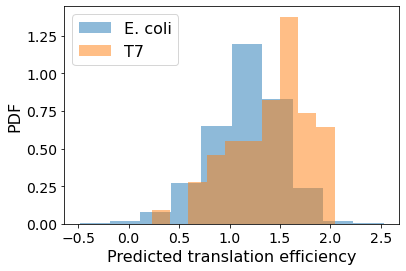

In [26]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(fitted_model.predict(host_df), alpha=0.5, density=True, label='E. coli');
ax.hist(fitted_model.predict(phage_df), alpha=0.5, density=True, label='T7');
ax.set_ylabel('PDF', fontsize=16)
ax.set_xlabel('Predicted translation efficiency', fontsize=16)
plt.tick_params(labelsize=14)
ax.legend(fontsize=16)

In [27]:
phage_df['translation_initation_preds'] = fitted_model.predict(phage_df)

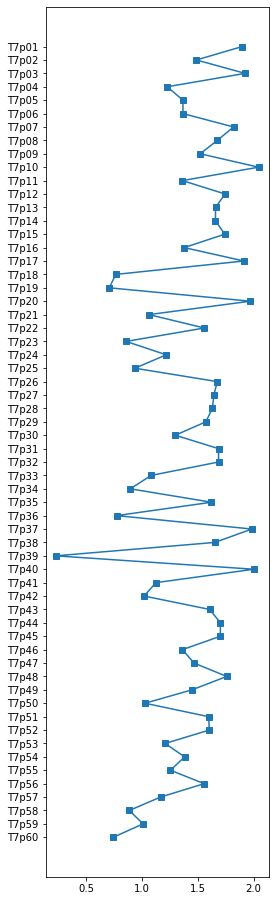

In [28]:
fig, ax = plt.subplots(figsize=(4,16))
ax.plot(phage_df['translation_initation_preds'][::-1], range(0, phage_df.shape[0]), marker='s')
ax.set_yticks(range(0, phage_df.shape[0]));
ax.set_yticklabels(phage_df.index[::-1]);

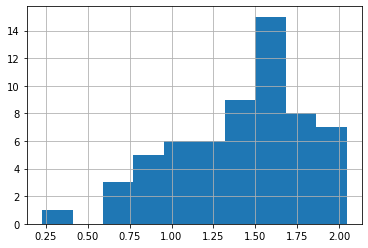

In [29]:
phage_df['translation_initation_preds'].hist()

In [30]:
phage_df.to_csv('../temp_refseq_alexis.tsv', sep='\t')

In [43]:
phage_df = pd.read_csv('../temp_alexis.tsv', sep='\t', index_col=0)
phage_df.drop_duplicates('start_location', inplace=True)
phage_df = phage_df.sort_values('start_location')
print(phage_df.shape)
phage_df.head()

(57, 8)


,start_location,CDS_fragment,Upstream_fragment,start_codon,aSD_binding,sec_struct,sec_struct_bound,translation_initation_preds
gene 0.3,924,ATGGCTATGTCTAACATGACTTACAACAACGTTTTCGACCACGCTT...,TTCACTAATAACTGCACGAGGTAACACAAG,ATG,-5.42,-10.13,-3.81,1.896023
gene 0.4,1277,ATGTCTACTACCAACGTGCAATACGGTCTGACCGCTCAAACTGTAC...,AGTCGAGGAGTACGAGGAGGATGAAGAGTA,ATG,-9.31,-19.01,-12.96,1.487170
gene 0.5,1495,ATGTATATGCTTACTATCGGTCTACTCACCGCTCTAGGTCTAGCTG...,TATGATTATCACTTTACTTATGAGGGAGTA,ATG,-5.82,-19.87,-8.50,1.225496
possible gene 0.6B,1635,ATGATGAAGCACTACGTTATGCCAATCCACACGTCCAACGGGGCAA...,CATAGGAATCATCAAAGGGGCACTACGCAA,ATG,-5.53,-17.68,-7.52,1.366909
gene 0.7,2020,ATGAACATTACCGACATCATGAACGCTATCGACGCAATCAAAGCAC...,TCTCATAACGAACATAAAGGACACAATGCA,ATG,-4.00,-7.46,-3.80,1.923308


In [44]:
salis_df = pd.read_csv('/Users/adamhockenberry/Downloads/t7_salis_rbs_results.csv')
salis_df = salis_df[salis_df['start_position'].isin(phage_df['start_location'])]
salis_df = salis_df.sort_values('start_position')
print(salis_df.shape)
salis_df.head()

(57, 10)


,start_position,ORF_number,tir,dG_total,dG_mRNA_rRNA,dG_spacing,dG_stacking,dG_standby,dG_start,dG_mRNA
35,924,0,161.407844,4.518649,-21.411351,0.000000,0,0.128599,-2.76,-28.540001
57,1277,2,3897.684716,-2.556651,-24.521352,1.728000,0,1.686800,-2.76,-21.920000
67,1495,1,3316.001936,-2.197525,-30.001351,0.005326,0,2.070000,-2.76,-28.790001
73,1635,0,275.909545,3.327349,-24.981351,1.152000,0,2.168600,-2.76,-27.750000
89,2020,1,10007.324876,-4.651852,-10.911352,0.288000,0,0.431400,-2.76,-8.490000


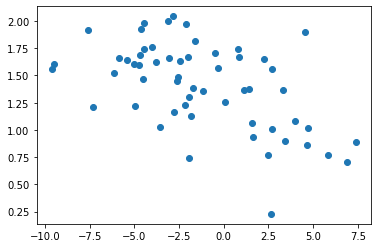

In [63]:
fig, ax = plt.subplots()
ax.scatter(salis_df['dG_total'], phage_df['translation_initation_preds'])
# ax.scatter(salis_df['tir'], np.exp(phage_df['translation_initation_preds']))
# ax.semilogy(salis_df['dG_total'], salis_df['tir'], 'bo')
# ax.scatter(salis_df['tir'], phage_df['translation_initation_preds'])
# ax.scatter(salis_df['dG_mRNA_rRNA'], phage_df['aSD_binding'])
# ax.scatter(salis_df['dG_mRNA'], phage_df['sec_struct'])